In [9]:
import pandas as pd
import os
import re
import numpy as np
import sklearn.linear_model as slm
pd.set_option('display.max_rows', None)  # To display all rows
pd.set_option('display.max_columns', None)  # To display all columns
# Set the maximum column width to a larger value
pd.set_option('display.max_colwidth', 1000)  # Adjust the value as needed

# Set the maximum number of rows to display, if needed
pd.set_option('display.max_rows', None)  # To display all rows

In [10]:
data = pd.read_csv("../data/SIB_impulsivity_scores.csv")

In [11]:
data

,Filename,Cohort,I plan tasks carefully,I do things without thinking,I make up my mind quickly,I am happy-go-lucky,I don't pay attention,I have racing thoughts,I plan trips well ahead of time,I am self-controlled,I concentrate easily,I save regularly,I squirm at plays or lectures,I am a careful thinker,I plan for job security,I say things without thinking,I like to think about complex problems,I change jobs,I act on impulse,I get easily bored when solving thought problems,I act on the spur of the moment,I am a steady thinker,I change residences,I buy things on impulse,I can only think about one thing at a time,I change hobbies,I spend or charge more than I earn,I often have extraneous thoughts when thinking,I am interested in the present rather than the future,I am restless at the theater or lectures,I like puzzles,I am future-oriented
0,ms_00_0002,0.0,0.481567,0.534834,0.507075,0.510670,0.459575,0.494764,0.537418,0.501579,0.440815,0.484231,0.547468,0.520894,0.540541,0.500092,0.557869,0.507860,0.511504,0.526789,0.469594,0.529332,0.473597,0.514074,0.540698,0.543696,0.541789,0.534844,0.540897,0.557287,0.477963,0.511272
1,ms_00_0003,0.0,0.462437,0.538969,0.506255,0.515196,0.463867,0.484367,0.538390,0.488764,0.414163,0.459202,0.552635,0.513846,0.535310,0.508581,0.565104,0.493120,0.497733,0.530395,0.476465,0.517579,0.457132,0.510813,0.561242,0.533308,0.534790,0.537451,0.549255,0.553754,0.465840,0.496157
2,ms_00_0005,0.0,0.497811,0.563684,0.528875,0.531636,0.494002,0.509782,0.553104,0.526750,0.462394,0.497824,0.571962,0.542037,0.556700,0.531945,0.575905,0.528365,0.531985,0.538745,0.486289,0.547254,0.502088,0.532066,0.562179,0.565329,0.548029,0.542355,0.552482,0.574159,0.510704,0.529238
3,ms_00_0006,0.0,0.474585,0.535073,0.517349,0.525543,0.473344,0.501965,0.533634,0.501835,0.448377,0.484536,0.544802,0.514265,0.539854,0.512192,0.555084,0.510386,0.512049,0.515829,0.470008,0.520018,0.481364,0.510034,0.541939,0.545059,0.521198,0.518885,0.537946,0.550399,0.497735,0.514226
4,ms_00_0007,0.0,0.480476,0.541566,0.519077,0.519773,0.470967,0.489602,0.546314,0.505617,0.439323,0.479902,0.547199,0.529044,0.535461,0.509445,0.560630,0.509268,0.512998,0.527296,0.481950,0.532965,0.477009,0.506244,0.564455,0.543608,0.535754,0.533942,0.553002,0.552101,0.482515,0.518712
5,ms_00_0008,0.0,0.488574,0.545630,0.527725,0.520996,0.467537,0.501073,0.551434,0.508667,0.443442,0.482719,0.558930,0.544058,0.560586,0.509055,0.576617,0.506925,0.512845,0.549735,0.479948,0.551123,0.477662,0.517146,0.575512,0.551481,0.549039,0.551256,0.567301,0.580319,0.478615,0.524127
6,ms_00_0009,0.0,0.470437,0.526630,0.504515,0.522063,0.436623,0.484729,0.538068,0.496136,0.422351,0.476401,0.538904,0.518449,0.539346,0.492871,0.560645,0.494854,0.506338,0.519697,0.484475,0.525977,0.467635,0.498726,0.563803,0.539099,0.529365,0.527915,0.566302,0.553715,0.460712,0.522038
7,ms_00_0010,0.0,0.482187,0.544641,0.525126,0.526451,0.458718,0.490771,0.552669,0.521197,0.434051,0.473560,0.550584,0.543972,0.546745,0.507107,0.583415,0.496924,0.516346,0.540767,0.499885,0.549090,0.474442,0.502829,0.583555,0.543611,0.539954,0.554086,0.578033,0.563540,0.471631,0.533000
8,ms_00_0011,0.0,0.489821,0.547578,0.515097,0.517696,0.458899,0.502548,0.548534,0.508454,0.446342,0.488027,0.550442,0.540844,0.556300,0.508021,0.590004,0.510158,0.525445,0.553342,0.486759,0.548976,0.480426,0.519909,0.562968,0.556311,0.544266,0.556525,0.568298,0.561884,0.488583,0.534487
9,ms_00_0012,0.0,0.490212,0.554448,0.510304,0.519873,0.463499,0.493128,0.554425,0.515736,0.435835,0.485602,0.562389,0.543794,0.557109,0.510861,0.588909,0.518415,0.512788,0.550696,0.474402,0.547408,0.477494,0.526782,0.567963,0.563653,0.562855,0.549785,0.565523,0.579970,0.490665,0.527448


In [12]:
demo=pd.read_csv("../data/SB_NLP_csvs_/Demo_data.csv")

In [13]:
demo

,Filename,Sex,Age
0,ms_00_0002,Male,35
1,ms_00_0003,Male,28
2,ms_00_0005,Female,26
3,ms_00_0006,Female,27
4,ms_00_0007,Male,27
5,ms_00_0008,Female,23
6,ms_00_0009,Male,25
7,ms_00_0010,Female,25
8,ms_00_0011,Male,30
9,ms_00_0012,Female,25


In [14]:
data_demo=data.merge(demo,on='Filename',how="inner")

In [15]:
data_demo

,Filename,Cohort,I plan tasks carefully,I do things without thinking,I make up my mind quickly,I am happy-go-lucky,I don't pay attention,I have racing thoughts,I plan trips well ahead of time,I am self-controlled,I concentrate easily,I save regularly,I squirm at plays or lectures,I am a careful thinker,I plan for job security,I say things without thinking,I like to think about complex problems,I change jobs,I act on impulse,I get easily bored when solving thought problems,I act on the spur of the moment,I am a steady thinker,I change residences,I buy things on impulse,I can only think about one thing at a time,I change hobbies,I spend or charge more than I earn,I often have extraneous thoughts when thinking,I am interested in the present rather than the future,I am restless at the theater or lectures,I like puzzles,I am future-oriented,Sex,Age
0,ms_00_0002,0.0,0.481567,0.534834,0.507075,0.510670,0.459575,0.494764,0.537418,0.501579,0.440815,0.484231,0.547468,0.520894,0.540541,0.500092,0.557869,0.507860,0.511504,0.526789,0.469594,0.529332,0.473597,0.514074,0.540698,0.543696,0.541789,0.534844,0.540897,0.557287,0.477963,0.511272,Male,35
1,ms_00_0003,0.0,0.462437,0.538969,0.506255,0.515196,0.463867,0.484367,0.538390,0.488764,0.414163,0.459202,0.552635,0.513846,0.535310,0.508581,0.565104,0.493120,0.497733,0.530395,0.476465,0.517579,0.457132,0.510813,0.561242,0.533308,0.534790,0.537451,0.549255,0.553754,0.465840,0.496157,Male,28
2,ms_00_0005,0.0,0.497811,0.563684,0.528875,0.531636,0.494002,0.509782,0.553104,0.526750,0.462394,0.497824,0.571962,0.542037,0.556700,0.531945,0.575905,0.528365,0.531985,0.538745,0.486289,0.547254,0.502088,0.532066,0.562179,0.565329,0.548029,0.542355,0.552482,0.574159,0.510704,0.529238,Female,26
3,ms_00_0006,0.0,0.474585,0.535073,0.517349,0.525543,0.473344,0.501965,0.533634,0.501835,0.448377,0.484536,0.544802,0.514265,0.539854,0.512192,0.555084,0.510386,0.512049,0.515829,0.470008,0.520018,0.481364,0.510034,0.541939,0.545059,0.521198,0.518885,0.537946,0.550399,0.497735,0.514226,Female,27
4,ms_00_0007,0.0,0.480476,0.541566,0.519077,0.519773,0.470967,0.489602,0.546314,0.505617,0.439323,0.479902,0.547199,0.529044,0.535461,0.509445,0.560630,0.509268,0.512998,0.527296,0.481950,0.532965,0.477009,0.506244,0.564455,0.543608,0.535754,0.533942,0.553002,0.552101,0.482515,0.518712,Male,27
5,ms_00_0008,0.0,0.488574,0.545630,0.527725,0.520996,0.467537,0.501073,0.551434,0.508667,0.443442,0.482719,0.558930,0.544058,0.560586,0.509055,0.576617,0.506925,0.512845,0.549735,0.479948,0.551123,0.477662,0.517146,0.575512,0.551481,0.549039,0.551256,0.567301,0.580319,0.478615,0.524127,Female,23
6,ms_00_0009,0.0,0.470437,0.526630,0.504515,0.522063,0.436623,0.484729,0.538068,0.496136,0.422351,0.476401,0.538904,0.518449,0.539346,0.492871,0.560645,0.494854,0.506338,0.519697,0.484475,0.525977,0.467635,0.498726,0.563803,0.539099,0.529365,0.527915,0.566302,0.553715,0.460712,0.522038,Male,25
7,ms_00_0010,0.0,0.482187,0.544641,0.525126,0.526451,0.458718,0.490771,0.552669,0.521197,0.434051,0.473560,0.550584,0.543972,0.546745,0.507107,0.583415,0.496924,0.516346,0.540767,0.499885,0.549090,0.474442,0.502829,0.583555,0.543611,0.539954,0.554086,0.578033,0.563540,0.471631,0.533000,Female,25
8,ms_00_0011,0.0,0.489821,0.547578,0.515097,0.517696,0.458899,0.502548,0.548534,0.508454,0.446342,0.488027,0.550442,0.540844,0.556300,0.508021,0.590004,0.510158,0.525445,0.553342,0.486759,0.548976,0.480426,0.519909,0.562968,0.556311,0.544266,0.556525,0.568298,0.561884,0.488583,0.534487,Male,30
9,ms_00_0012,0.0,0.490212,0.554448,0.510304,0.519873,0.463499,0.493128,0.554425,0.515736,0.435835,0.485602,0.562389,0.543794,0.557109,0.510861,0.588909,0.518415,0.512788,0.550696,0.474402,0.547408,0.477494,0.526782,0.567963,0.563653,0.562855,0.549785,0.565523,0.579970,0.490665,0.527448,Female,25


In [16]:
healthy_df = data_demo[data_demo["Cohort"]==0]
minus_sb_df = data_demo[data_demo["Cohort"]==1]
plus_sb_df = data_demo[data_demo["Cohort"]==2]

In [17]:
healthy_df.shape

(29, 34)

In [18]:
minus_sb_df.shape

(62, 34)

In [19]:
plus_sb_df.shape

(19, 34)

In [20]:
healthy_df

,Filename,Cohort,I plan tasks carefully,I do things without thinking,I make up my mind quickly,I am happy-go-lucky,I don't pay attention,I have racing thoughts,I plan trips well ahead of time,I am self-controlled,I concentrate easily,I save regularly,I squirm at plays or lectures,I am a careful thinker,I plan for job security,I say things without thinking,I like to think about complex problems,I change jobs,I act on impulse,I get easily bored when solving thought problems,I act on the spur of the moment,I am a steady thinker,I change residences,I buy things on impulse,I can only think about one thing at a time,I change hobbies,I spend or charge more than I earn,I often have extraneous thoughts when thinking,I am interested in the present rather than the future,I am restless at the theater or lectures,I like puzzles,I am future-oriented,Sex,Age
0,ms_00_0002,0.0,0.481567,0.534834,0.507075,0.510670,0.459575,0.494764,0.537418,0.501579,0.440815,0.484231,0.547468,0.520894,0.540541,0.500092,0.557869,0.507860,0.511504,0.526789,0.469594,0.529332,0.473597,0.514074,0.540698,0.543696,0.541789,0.534844,0.540897,0.557287,0.477963,0.511272,Male,35
1,ms_00_0003,0.0,0.462437,0.538969,0.506255,0.515196,0.463867,0.484367,0.538390,0.488764,0.414163,0.459202,0.552635,0.513846,0.535310,0.508581,0.565104,0.493120,0.497733,0.530395,0.476465,0.517579,0.457132,0.510813,0.561242,0.533308,0.534790,0.537451,0.549255,0.553754,0.465840,0.496157,Male,28
2,ms_00_0005,0.0,0.497811,0.563684,0.528875,0.531636,0.494002,0.509782,0.553104,0.526750,0.462394,0.497824,0.571962,0.542037,0.556700,0.531945,0.575905,0.528365,0.531985,0.538745,0.486289,0.547254,0.502088,0.532066,0.562179,0.565329,0.548029,0.542355,0.552482,0.574159,0.510704,0.529238,Female,26
3,ms_00_0006,0.0,0.474585,0.535073,0.517349,0.525543,0.473344,0.501965,0.533634,0.501835,0.448377,0.484536,0.544802,0.514265,0.539854,0.512192,0.555084,0.510386,0.512049,0.515829,0.470008,0.520018,0.481364,0.510034,0.541939,0.545059,0.521198,0.518885,0.537946,0.550399,0.497735,0.514226,Female,27
4,ms_00_0007,0.0,0.480476,0.541566,0.519077,0.519773,0.470967,0.489602,0.546314,0.505617,0.439323,0.479902,0.547199,0.529044,0.535461,0.509445,0.560630,0.509268,0.512998,0.527296,0.481950,0.532965,0.477009,0.506244,0.564455,0.543608,0.535754,0.533942,0.553002,0.552101,0.482515,0.518712,Male,27
5,ms_00_0008,0.0,0.488574,0.545630,0.527725,0.520996,0.467537,0.501073,0.551434,0.508667,0.443442,0.482719,0.558930,0.544058,0.560586,0.509055,0.576617,0.506925,0.512845,0.549735,0.479948,0.551123,0.477662,0.517146,0.575512,0.551481,0.549039,0.551256,0.567301,0.580319,0.478615,0.524127,Female,23
6,ms_00_0009,0.0,0.470437,0.526630,0.504515,0.522063,0.436623,0.484729,0.538068,0.496136,0.422351,0.476401,0.538904,0.518449,0.539346,0.492871,0.560645,0.494854,0.506338,0.519697,0.484475,0.525977,0.467635,0.498726,0.563803,0.539099,0.529365,0.527915,0.566302,0.553715,0.460712,0.522038,Male,25
7,ms_00_0010,0.0,0.482187,0.544641,0.525126,0.526451,0.458718,0.490771,0.552669,0.521197,0.434051,0.473560,0.550584,0.543972,0.546745,0.507107,0.583415,0.496924,0.516346,0.540767,0.499885,0.549090,0.474442,0.502829,0.583555,0.543611,0.539954,0.554086,0.578033,0.563540,0.471631,0.533000,Female,25
8,ms_00_0011,0.0,0.489821,0.547578,0.515097,0.517696,0.458899,0.502548,0.548534,0.508454,0.446342,0.488027,0.550442,0.540844,0.556300,0.508021,0.590004,0.510158,0.525445,0.553342,0.486759,0.548976,0.480426,0.519909,0.562968,0.556311,0.544266,0.556525,0.568298,0.561884,0.488583,0.534487,Male,30
9,ms_00_0012,0.0,0.490212,0.554448,0.510304,0.519873,0.463499,0.493128,0.554425,0.515736,0.435835,0.485602,0.562389,0.543794,0.557109,0.510861,0.588909,0.518415,0.512788,0.550696,0.474402,0.547408,0.477494,0.526782,0.567963,0.563653,0.562855,0.549785,0.565523,0.579970,0.490665,0.527448,Female,25


In [21]:
columns_to_iterate = healthy_df.columns[2:32]
for col in columns_to_iterate:
    healthy_df_copy = healthy_df.copy()
    healthy_mean = np.mean(healthy_df['Age'].mean())
    X_healthy = healthy_df[['Age']] -  healthy_mean
    y_healthy = healthy_df[col]

    # Create a linear regression model
    model_healthy = slm.LinearRegression().fit(X_healthy, y_healthy)

    y_healthy_values = y_healthy.values
    # reshaping series 
    y_healthy_reshaped = y_healthy_values.reshape((y_healthy.shape[0], 1))

    corrected_healthy = y_healthy_reshaped - (model_healthy.coef_ * X_healthy)
    healthy_df_copy[col] = corrected_healthy
    healthy_df = healthy_df_copy

In [22]:
healthy_df

,Filename,Cohort,I plan tasks carefully,I do things without thinking,I make up my mind quickly,I am happy-go-lucky,I don't pay attention,I have racing thoughts,I plan trips well ahead of time,I am self-controlled,I concentrate easily,I save regularly,I squirm at plays or lectures,I am a careful thinker,I plan for job security,I say things without thinking,I like to think about complex problems,I change jobs,I act on impulse,I get easily bored when solving thought problems,I act on the spur of the moment,I am a steady thinker,I change residences,I buy things on impulse,I can only think about one thing at a time,I change hobbies,I spend or charge more than I earn,I often have extraneous thoughts when thinking,I am interested in the present rather than the future,I am restless at the theater or lectures,I like puzzles,I am future-oriented,Sex,Age
0,ms_00_0002,0.0,0.484142,0.537676,0.510807,0.509639,0.461079,0.494558,0.540803,0.504568,0.442008,0.483280,0.551027,0.526782,0.542553,0.502925,0.563551,0.508004,0.513819,0.535087,0.470651,0.533217,0.475418,0.516692,0.544649,0.547698,0.544089,0.539581,0.547779,0.562329,0.481741,0.515686,Male,35
1,ms_00_0003,0.0,0.462905,0.539485,0.506932,0.515009,0.464140,0.484329,0.539004,0.489307,0.414379,0.459030,0.553281,0.514914,0.535675,0.509095,0.566136,0.493146,0.498153,0.531901,0.476657,0.518284,0.457462,0.511288,0.561959,0.534035,0.535207,0.538311,0.550503,0.554669,0.466526,0.496958,Male,28
2,ms_00_0005,0.0,0.497676,0.563535,0.528680,0.531690,0.493923,0.509793,0.552927,0.526594,0.462331,0.497874,0.571776,0.541729,0.556595,0.531797,0.575607,0.528357,0.531864,0.538310,0.486233,0.547050,0.501992,0.531929,0.561972,0.565119,0.547909,0.542106,0.552121,0.573895,0.510506,0.529006,Female,26
3,ms_00_0006,0.0,0.474751,0.535256,0.517590,0.525476,0.473441,0.501951,0.533853,0.502028,0.448454,0.484475,0.545031,0.514645,0.539983,0.512375,0.555451,0.510396,0.512198,0.516365,0.470076,0.520269,0.481481,0.510203,0.542194,0.545317,0.521346,0.519191,0.538390,0.550724,0.497979,0.514511,Female,27
4,ms_00_0007,0.0,0.480642,0.541749,0.519318,0.519707,0.471064,0.489588,0.546533,0.505810,0.439400,0.479841,0.547428,0.529424,0.535591,0.509628,0.560996,0.509277,0.513147,0.527831,0.482019,0.533216,0.477127,0.506413,0.564710,0.543866,0.535902,0.534248,0.553446,0.552427,0.482759,0.518997,Male,27
5,ms_00_0008,0.0,0.487535,0.544484,0.526220,0.521412,0.466931,0.501157,0.550069,0.507461,0.442960,0.483102,0.557495,0.541683,0.559774,0.507912,0.574325,0.506866,0.511912,0.546389,0.479521,0.549557,0.476928,0.516091,0.573919,0.549867,0.548111,0.549347,0.564527,0.578286,0.477092,0.522347,Female,23
6,ms_00_0009,0.0,0.470001,0.526149,0.503883,0.522238,0.436368,0.484764,0.537494,0.495630,0.422149,0.476562,0.538301,0.517451,0.539005,0.492391,0.559682,0.494829,0.505946,0.518292,0.484296,0.525319,0.467326,0.498283,0.563134,0.538422,0.528976,0.527113,0.565137,0.552861,0.460072,0.521291,Male,25
7,ms_00_0010,0.0,0.481751,0.544160,0.524494,0.526625,0.458463,0.490806,0.552096,0.520691,0.433849,0.473721,0.549981,0.542975,0.546404,0.506627,0.582453,0.496899,0.515954,0.539362,0.499706,0.548432,0.474133,0.502385,0.582886,0.542933,0.539564,0.553284,0.576867,0.562686,0.470991,0.532252,Female,25
8,ms_00_0011,0.0,0.490891,0.548758,0.516647,0.517267,0.459524,0.502463,0.549939,0.509696,0.446837,0.487632,0.551920,0.543289,0.557136,0.509197,0.592364,0.510218,0.526406,0.556789,0.487199,0.550590,0.481182,0.520997,0.564609,0.557972,0.545221,0.558493,0.571155,0.563978,0.490153,0.536320,Male,30
9,ms_00_0012,0.0,0.489776,0.553967,0.509672,0.520047,0.463245,0.493163,0.553852,0.515230,0.435633,0.485763,0.561786,0.542797,0.556768,0.510381,0.587946,0.518391,0.512396,0.549291,0.474223,0.546750,0.477185,0.526338,0.567294,0.562975,0.562466,0.548983,0.564357,0.579116,0.490025,0.526700,Female,25


In [23]:
for col in columns_to_iterate:
    minus_sb_df_copy = minus_sb_df.copy()
    X_minus_sb = minus_sb_df[['Age']] -  healthy_mean
    y_minus_sb = minus_sb_df[col]

    
    y_minus_sb_values = y_minus_sb.values
    # reshaping series 
    y_minus_sb_reshaped = y_minus_sb_values.reshape((y_minus_sb.shape[0], 1))

    corrected_minus_sb = y_minus_sb_reshaped - (model_healthy.coef_ * X_minus_sb)
    minus_sb_df_copy[col] = corrected_minus_sb
    minus_sb_df = minus_sb_df_copy

In [24]:
minus_sb_df

,Filename,Cohort,I plan tasks carefully,I do things without thinking,I make up my mind quickly,I am happy-go-lucky,I don't pay attention,I have racing thoughts,I plan trips well ahead of time,I am self-controlled,I concentrate easily,I save regularly,I squirm at plays or lectures,I am a careful thinker,I plan for job security,I say things without thinking,I like to think about complex problems,I change jobs,I act on impulse,I get easily bored when solving thought problems,I act on the spur of the moment,I am a steady thinker,I change residences,I buy things on impulse,I can only think about one thing at a time,I change hobbies,I spend or charge more than I earn,I often have extraneous thoughts when thinking,I am interested in the present rather than the future,I am restless at the theater or lectures,I like puzzles,I am future-oriented,Sex,Age
29,ms_04_0002,1.0,0.496541,0.544299,0.522119,0.515224,0.459747,0.490902,0.550478,0.519341,0.445266,0.477002,0.545815,0.547288,0.548592,0.516029,0.580628,0.506319,0.523608,0.554715,0.487597,0.546882,0.486540,0.514053,0.571299,0.550724,0.537354,0.553568,0.577764,0.562385,0.480637,0.535288,Male,22
30,ms_04_0003,1.0,0.512365,0.566668,0.544184,0.518011,0.490034,0.524461,0.544200,0.542208,0.483720,0.513445,0.549123,0.552317,0.553063,0.535416,0.586739,0.535847,0.545160,0.543358,0.488327,0.555508,0.518933,0.522028,0.569615,0.566821,0.546703,0.552408,0.566094,0.568108,0.519831,0.545524,Female,24
31,ms_04_0004,1.0,0.500028,0.561924,0.515245,0.523591,0.470209,0.506410,0.557087,0.512244,0.446355,0.500927,0.575966,0.549822,0.553257,0.524354,0.597496,0.521448,0.524204,0.566238,0.473825,0.554921,0.490009,0.543163,0.568252,0.572066,0.568712,0.562781,0.570734,0.586722,0.505697,0.519767,Female,35
32,ms_04_0005,1.0,0.476692,0.552863,0.521050,0.514053,0.470139,0.489890,0.544016,0.513181,0.425918,0.469840,0.561101,0.537221,0.541912,0.522452,0.581111,0.505305,0.516852,0.547285,0.492192,0.538849,0.475558,0.520474,0.569308,0.551229,0.542836,0.554246,0.565851,0.567595,0.475944,0.522677,Male,34
33,ms_04_0006,1.0,0.499700,0.563259,0.534012,0.520167,0.474710,0.512765,0.550446,0.525749,0.459701,0.495557,0.560168,0.547443,0.553943,0.529467,0.587160,0.524598,0.538588,0.548884,0.488870,0.555226,0.501114,0.527519,0.572991,0.564865,0.542467,0.556816,0.568239,0.576552,0.497535,0.535358,Female,28
35,ms_04_0008,1.0,0.489255,0.555652,0.530860,0.522661,0.496906,0.502484,0.569508,0.519117,0.448779,0.480163,0.581442,0.543282,0.557026,0.521079,0.585911,0.513438,0.520528,0.550004,0.492221,0.548554,0.484159,0.518042,0.576866,0.555880,0.551221,0.564458,0.565170,0.582546,0.491398,0.524593,Male,27
36,ms_04_0010,1.0,0.485476,0.567442,0.528930,0.515775,0.493245,0.505666,0.539211,0.518936,0.443159,0.478794,0.566111,0.534632,0.530579,0.541065,0.587177,0.518796,0.528117,0.550393,0.484315,0.537361,0.493056,0.519214,0.572603,0.555791,0.540501,0.559023,0.563697,0.566266,0.495006,0.514001,Male,20
37,ms_04_0013,1.0,0.492649,0.531515,0.515931,0.499928,0.466284,0.520804,0.507110,0.530732,0.476981,0.504431,0.531665,0.512790,0.529875,0.509692,0.557848,0.523150,0.507660,0.506218,0.454863,0.517084,0.495785,0.494864,0.509412,0.559392,0.539692,0.519866,0.536362,0.542766,0.537913,0.525959,Male,16
38,ms_04_0016,1.0,0.503350,0.547175,0.515831,0.513342,0.479008,0.515501,0.529480,0.510816,0.476562,0.517373,0.549806,0.520265,0.554738,0.523919,0.562827,0.538111,0.529967,0.529281,0.455431,0.530289,0.504569,0.523008,0.534072,0.562638,0.539901,0.515083,0.535399,0.558379,0.526725,0.522458,Male,22
39,ms_04_0017,1.0,0.512315,0.567856,0.530071,0.532153,0.480885,0.520642,0.556430,0.532182,0.473104,0.514649,0.557399,0.549060,0.580615,0.532347,0.581869,0.543319,0.543592,0.539963,0.486939,0.562044,0.509225,0.539423,0.566732,0.574497,0.559070,0.544007,0.561539,0.574701,0.509586,0.547835,Male,29


In [25]:
plus_sb_df

,Filename,Cohort,I plan tasks carefully,I do things without thinking,I make up my mind quickly,I am happy-go-lucky,I don't pay attention,I have racing thoughts,I plan trips well ahead of time,I am self-controlled,I concentrate easily,I save regularly,I squirm at plays or lectures,I am a careful thinker,I plan for job security,I say things without thinking,I like to think about complex problems,I change jobs,I act on impulse,I get easily bored when solving thought problems,I act on the spur of the moment,I am a steady thinker,I change residences,I buy things on impulse,I can only think about one thing at a time,I change hobbies,I spend or charge more than I earn,I often have extraneous thoughts when thinking,I am interested in the present rather than the future,I am restless at the theater or lectures,I like puzzles,I am future-oriented,Sex,Age
34,ms_04_0007,2.0,0.487230,0.547896,0.524223,0.517531,0.468001,0.499262,0.547051,0.512336,0.447384,0.480851,0.557548,0.535996,0.557172,0.512171,0.576506,0.513204,0.516624,0.546727,0.479964,0.540912,0.483339,0.518494,0.564352,0.557025,0.547040,0.549764,0.564941,0.571648,0.489448,0.534522,Female,20
42,ms_04_0021,2.0,0.492283,0.560855,0.520708,0.520211,0.457184,0.494643,0.548801,0.528176,0.434793,0.487040,0.553839,0.551345,0.561842,0.516951,0.588788,0.515728,0.526412,0.546925,0.496229,0.559332,0.489001,0.520396,0.589704,0.560410,0.546996,0.556026,0.580984,0.571904,0.465919,0.542938,Female,26
44,ms_04_0023,2.0,0.487145,0.550737,0.508294,0.511036,0.458726,0.487285,0.544788,0.505516,0.435193,0.477829,0.553660,0.531071,0.556989,0.505734,0.571759,0.505190,0.518143,0.549938,0.480868,0.537669,0.473259,0.518329,0.566976,0.543480,0.551401,0.554676,0.557863,0.564062,0.460733,0.521588,Male,30
48,ms_04_0027,2.0,0.482354,0.550645,0.516750,0.522345,0.469254,0.492329,0.534107,0.523261,0.436448,0.482354,0.554178,0.534520,0.540795,0.517150,0.570871,0.507792,0.522349,0.540054,0.493149,0.538030,0.484878,0.507633,0.574331,0.543566,0.539042,0.549658,0.563940,0.564245,0.470325,0.521892,Female,18
55,ms_04_0035,2.0,0.503773,0.565979,0.538521,0.529323,0.501858,0.515387,0.555285,0.539278,0.468738,0.501075,0.572289,0.547040,0.560241,0.533774,0.577677,0.531923,0.536208,0.535543,0.496776,0.555474,0.508981,0.528148,0.573496,0.562571,0.548878,0.551798,0.557680,0.580321,0.498090,0.534597,Female,20
61,ms_04_0041,2.0,0.484702,0.553308,0.522655,0.513765,0.501349,0.511951,0.522667,0.522295,0.462367,0.496541,0.558777,0.514143,0.530146,0.536040,0.554212,0.531841,0.528836,0.512089,0.472211,0.519390,0.505667,0.512955,0.542532,0.550193,0.528534,0.518219,0.526521,0.555275,0.509716,0.515303,Female,19
62,ms_04_0042,2.0,0.484023,0.557040,0.523438,0.522621,0.485751,0.498176,0.549752,0.513720,0.445549,0.484064,0.565921,0.526705,0.545106,0.523535,0.570194,0.522575,0.518065,0.530061,0.483263,0.535338,0.491260,0.518036,0.572128,0.552648,0.537581,0.544848,0.550859,0.567969,0.481339,0.519376,Female,17
65,ms_04_0045,2.0,0.490370,0.542769,0.525233,0.526236,0.473356,0.496858,0.547086,0.515563,0.448808,0.487423,0.550344,0.536979,0.553325,0.509400,0.563852,0.509881,0.517689,0.532253,0.492608,0.542355,0.483016,0.512927,0.565632,0.549458,0.539746,0.538747,0.554696,0.555435,0.481097,0.534355,Female,22
81,ms_04_0070,2.0,0.499837,0.565678,0.532041,0.534506,0.496932,0.511019,0.556646,0.534562,0.457113,0.499209,0.574398,0.549201,0.564709,0.535154,0.585352,0.529221,0.537019,0.539235,0.503458,0.555237,0.504537,0.522443,0.583978,0.565420,0.540652,0.551665,0.566580,0.573479,0.494982,0.540563,Female,22
82,ms_04_0072,2.0,0.473407,0.552512,0.529468,0.516689,0.486610,0.496038,0.543219,0.522886,0.430615,0.470137,0.564250,0.532423,0.539504,0.521342,0.579505,0.504475,0.514419,0.543056,0.495306,0.537116,0.484307,0.511650,0.587785,0.543716,0.549057,0.562379,0.572579,0.574249,0.464351,0.521252,Female,28


In [26]:
for col in columns_to_iterate:
    plus_sb_df_copy = plus_sb_df.copy()
    X_plus_sb = plus_sb_df[['Age']] -  healthy_mean
    y_plus_sb = plus_sb_df[col]

    
    y_plus_sb_values = y_plus_sb.values
    # reshaping series 
    y_plus_sb_reshaped = y_plus_sb_values.reshape((y_plus_sb.shape[0], 1))

    corrected_plus_sb = y_plus_sb_reshaped - (model_healthy.coef_ * X_plus_sb)
    plus_sb_df_copy[col] = corrected_plus_sb
    plus_sb_df = plus_sb_df_copy

In [27]:
plus_sb_df

,Filename,Cohort,I plan tasks carefully,I do things without thinking,I make up my mind quickly,I am happy-go-lucky,I don't pay attention,I have racing thoughts,I plan trips well ahead of time,I am self-controlled,I concentrate easily,I save regularly,I squirm at plays or lectures,I am a careful thinker,I plan for job security,I say things without thinking,I like to think about complex problems,I change jobs,I act on impulse,I get easily bored when solving thought problems,I act on the spur of the moment,I am a steady thinker,I change residences,I buy things on impulse,I can only think about one thing at a time,I change hobbies,I spend or charge more than I earn,I often have extraneous thoughts when thinking,I am interested in the present rather than the future,I am restless at the theater or lectures,I like puzzles,I am future-oriented,Sex,Age
34,ms_04_0007,2.0,0.483901,0.544568,0.520895,0.514203,0.464673,0.495934,0.543723,0.509008,0.444056,0.477522,0.554219,0.532668,0.553843,0.508842,0.573177,0.509876,0.513296,0.543398,0.476636,0.537583,0.480010,0.515165,0.561023,0.553696,0.543712,0.546435,0.561612,0.568319,0.486120,0.531194,Female,20
42,ms_04_0021,2.0,0.492051,0.560624,0.520477,0.519980,0.456953,0.494412,0.548570,0.527945,0.434562,0.486809,0.553608,0.551113,0.561611,0.516720,0.588556,0.515497,0.526181,0.546694,0.495997,0.559100,0.488769,0.520164,0.589472,0.560178,0.546765,0.555795,0.580753,0.571672,0.465688,0.542707,Female,26
44,ms_04_0023,2.0,0.488979,0.552571,0.510128,0.512869,0.460559,0.489119,0.546622,0.507350,0.437027,0.479662,0.555493,0.532904,0.558822,0.507567,0.573592,0.507023,0.519976,0.551771,0.482701,0.539502,0.475093,0.520162,0.568809,0.545313,0.553234,0.556509,0.559697,0.565896,0.462567,0.523422,Male,30
48,ms_04_0027,2.0,0.477993,0.546284,0.512389,0.517984,0.464893,0.487968,0.529746,0.518900,0.432087,0.477993,0.549817,0.530159,0.536434,0.512789,0.566510,0.503431,0.517988,0.535693,0.488788,0.533670,0.480517,0.503272,0.569970,0.539205,0.534681,0.545298,0.559579,0.559884,0.465964,0.517532,Female,18
55,ms_04_0035,2.0,0.500445,0.562651,0.535192,0.525995,0.498530,0.512059,0.551956,0.535949,0.465409,0.497747,0.568961,0.543712,0.556913,0.530445,0.574348,0.528594,0.532879,0.532215,0.493447,0.552145,0.505653,0.524820,0.570168,0.559243,0.545550,0.548469,0.554352,0.576992,0.494762,0.531269,Female,20
61,ms_04_0041,2.0,0.480857,0.549463,0.518810,0.509920,0.497504,0.508107,0.518823,0.518450,0.458522,0.492696,0.554932,0.510298,0.526301,0.532196,0.550367,0.527997,0.524992,0.508244,0.468366,0.515545,0.501822,0.509111,0.538687,0.546348,0.524689,0.514375,0.522676,0.551430,0.505871,0.511458,Female,19
62,ms_04_0042,2.0,0.479146,0.552163,0.518561,0.517744,0.480874,0.493299,0.544875,0.508843,0.440672,0.479187,0.561044,0.521828,0.540229,0.518658,0.565317,0.517698,0.513188,0.525184,0.478386,0.530461,0.486383,0.513159,0.567251,0.547771,0.532704,0.539971,0.545982,0.563092,0.476462,0.514498,Female,17
65,ms_04_0045,2.0,0.488074,0.540473,0.522937,0.523940,0.471060,0.494562,0.544790,0.513267,0.446512,0.485127,0.548048,0.534683,0.551029,0.507104,0.561556,0.507585,0.515393,0.529956,0.490311,0.540059,0.480719,0.510631,0.563336,0.547161,0.537450,0.536451,0.552400,0.553139,0.478800,0.532059,Female,22
81,ms_04_0070,2.0,0.497541,0.563382,0.529745,0.532210,0.494635,0.508723,0.554350,0.532266,0.454817,0.496912,0.572102,0.546905,0.562412,0.532858,0.583056,0.526925,0.534723,0.536939,0.501162,0.552941,0.502241,0.520147,0.581682,0.563123,0.538356,0.549368,0.564284,0.571183,0.492685,0.538267,Female,22
82,ms_04_0072,2.0,0.474208,0.553313,0.530269,0.517490,0.487411,0.496839,0.544020,0.523687,0.431416,0.470938,0.565051,0.533224,0.540305,0.522143,0.580306,0.505276,0.515220,0.543857,0.496107,0.537917,0.485108,0.512451,0.588586,0.544517,0.549858,0.563180,0.573380,0.575050,0.465152,0.522053,Female,28


/var/folders/z4/3rsgqylj0js6lvck7xgrvck80000gn/T/ipykernel_59053/4047403874.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


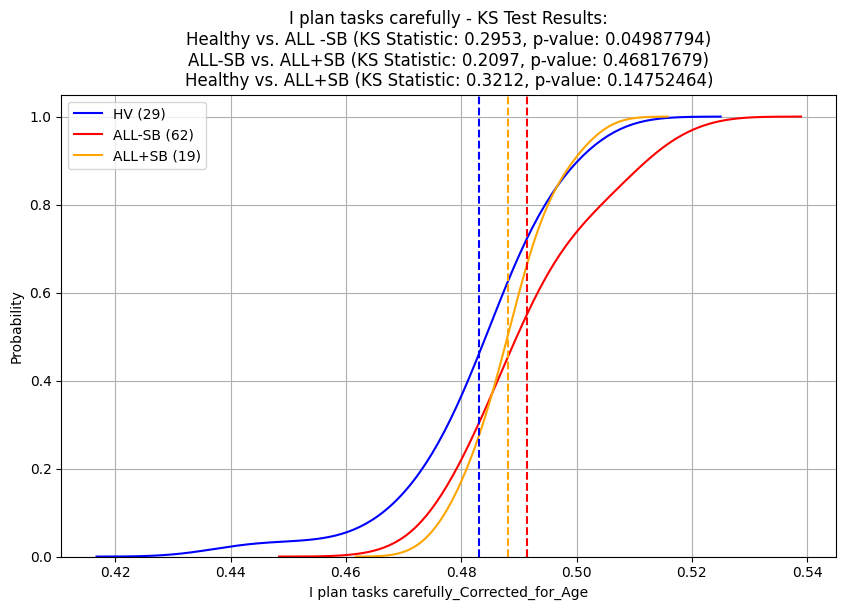

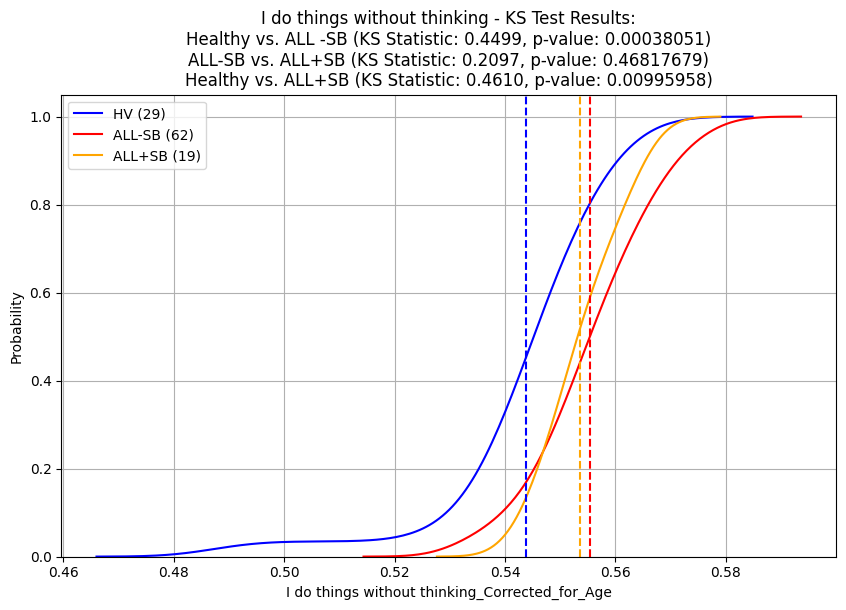

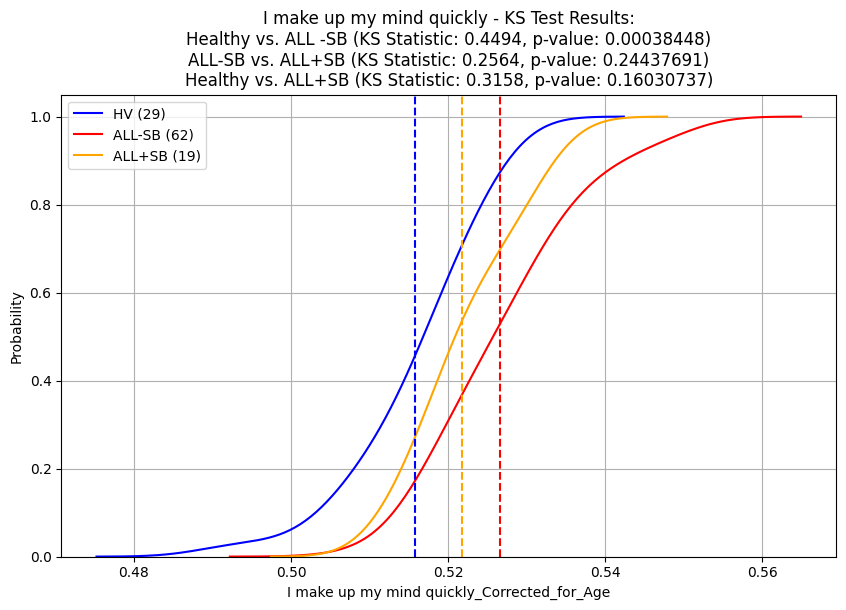

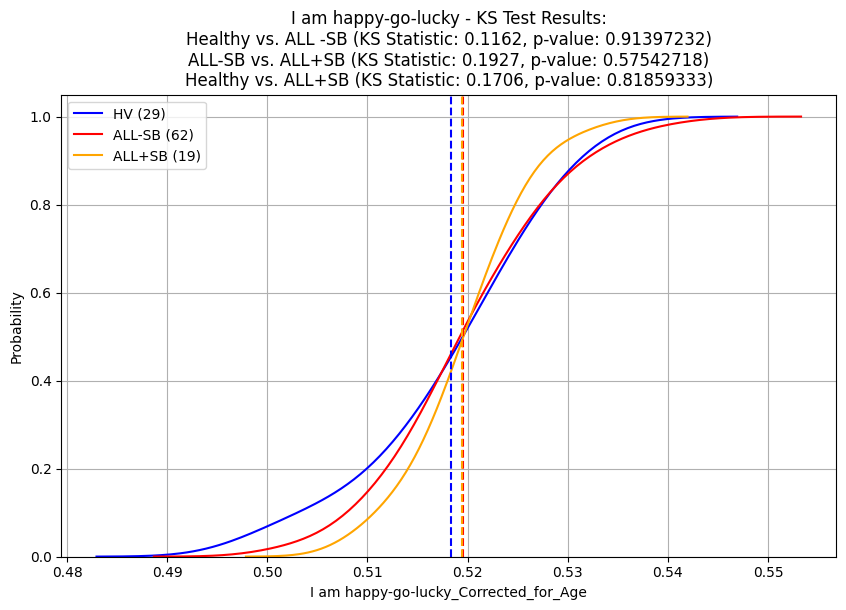

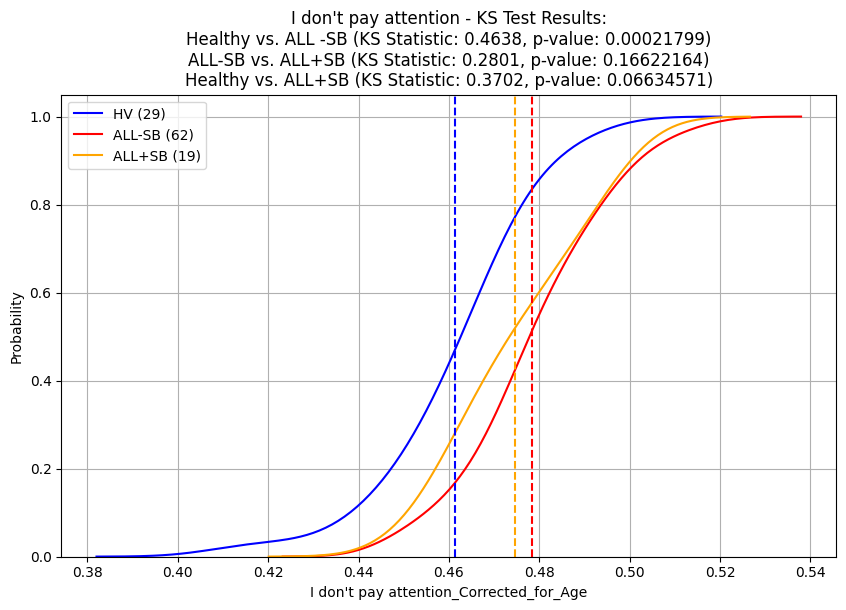

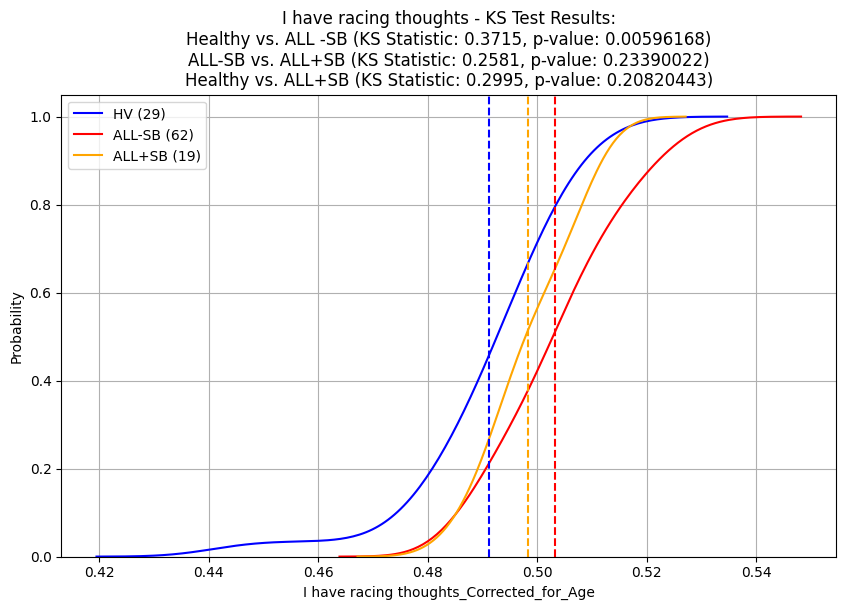

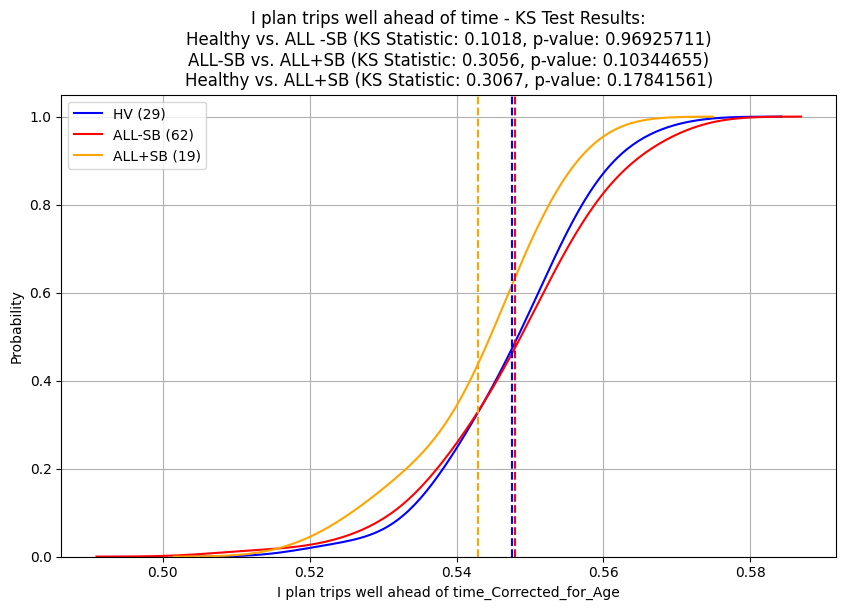

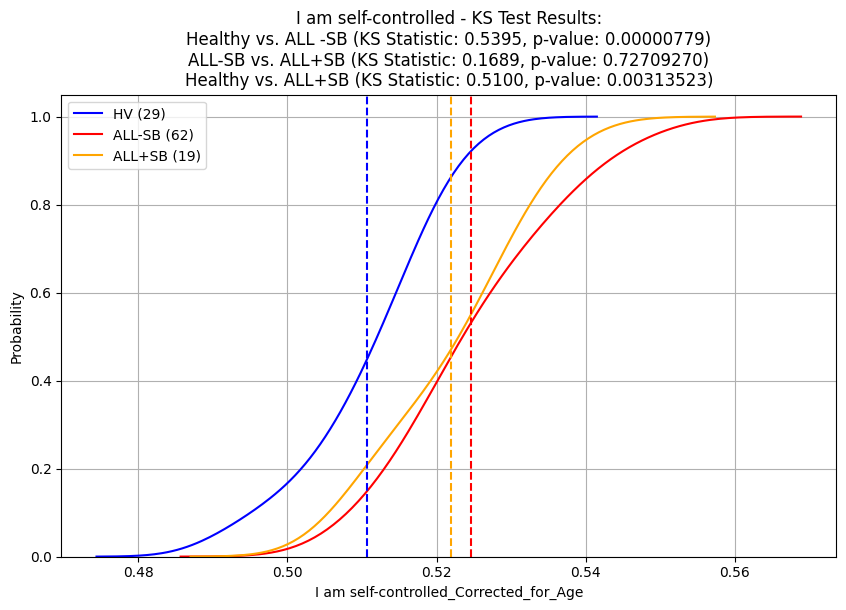

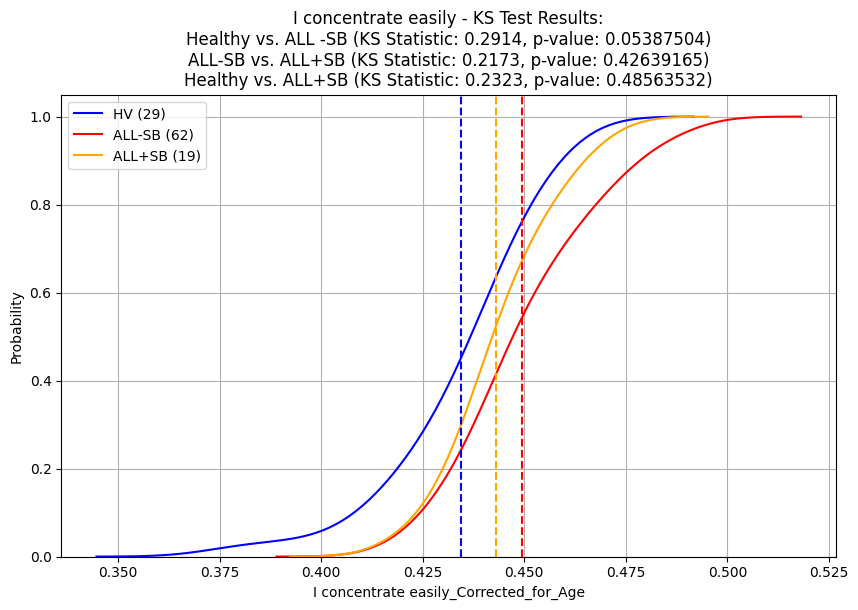

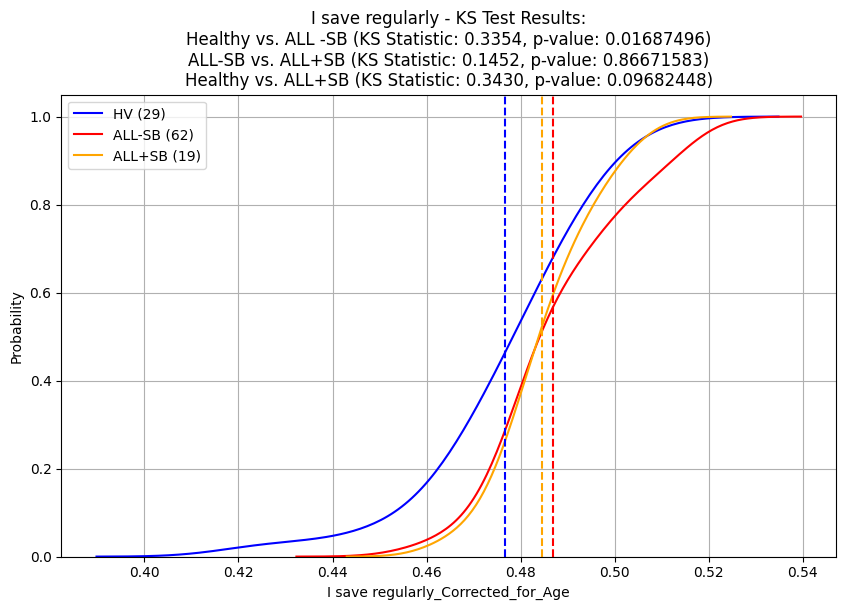

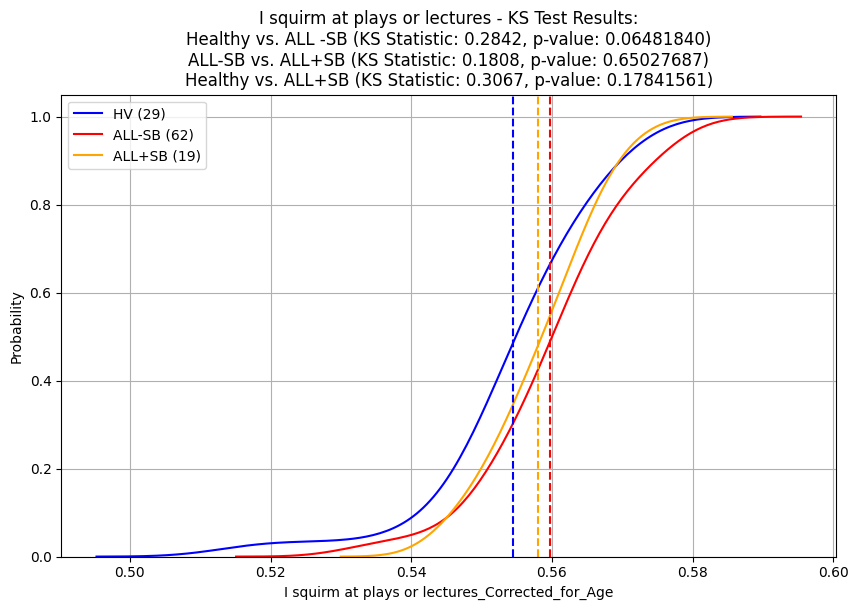

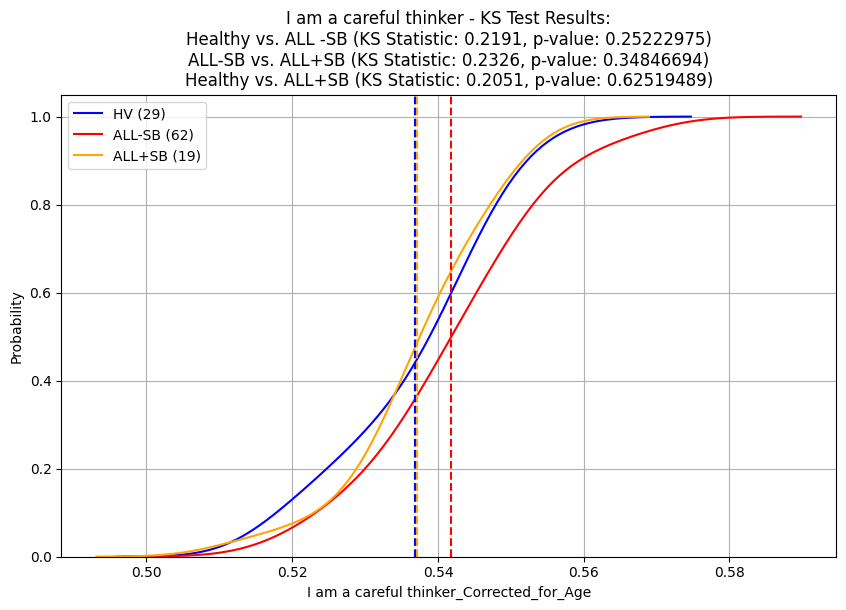

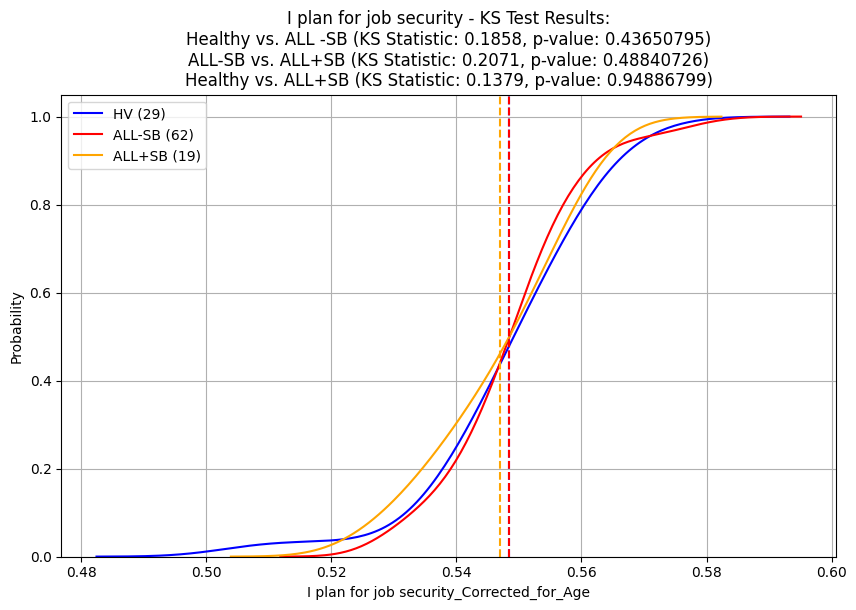

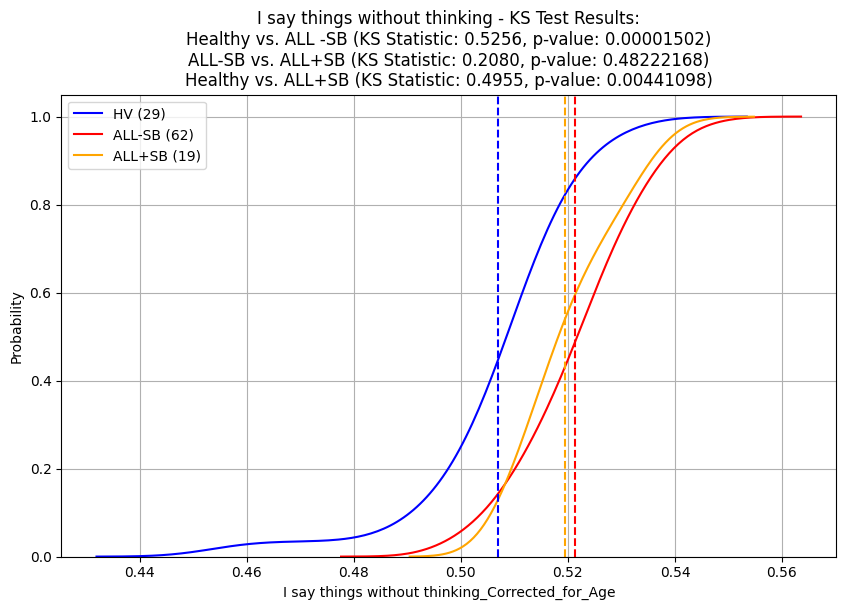

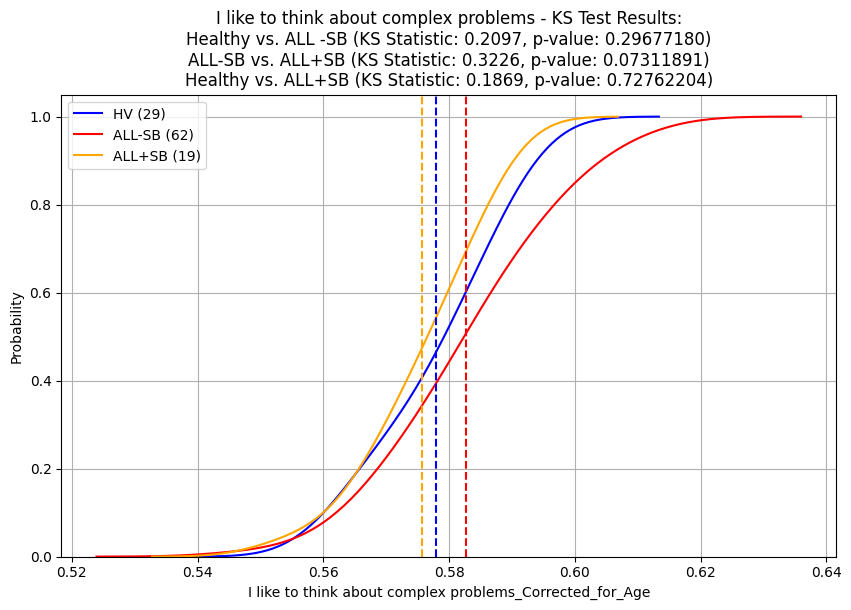

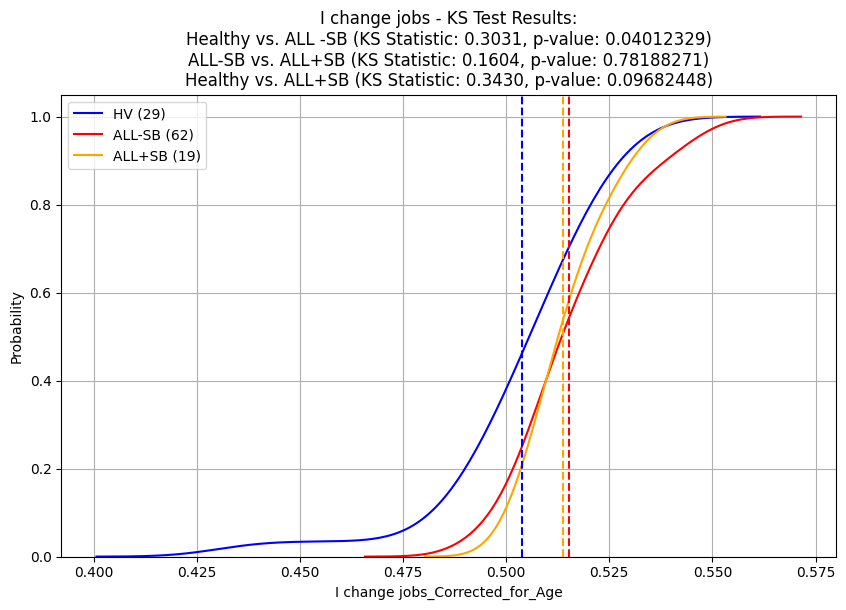

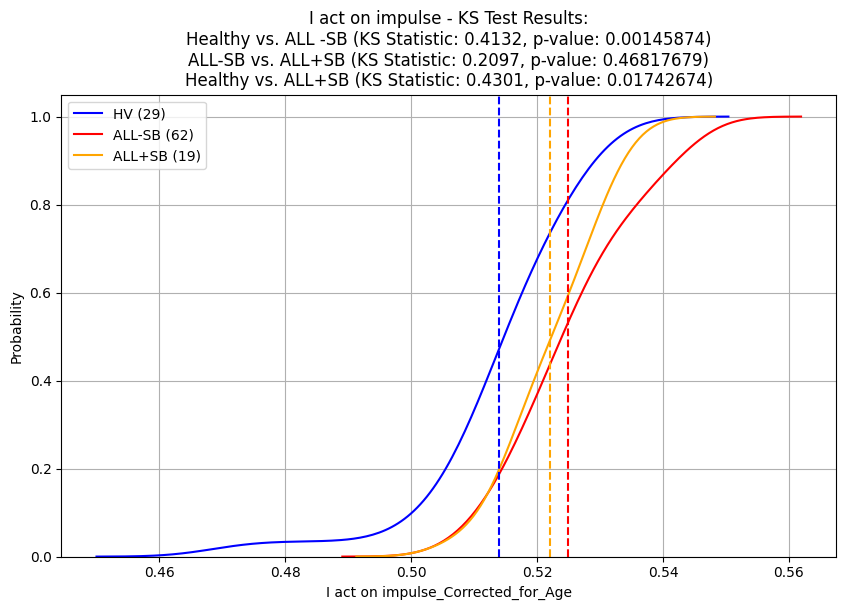

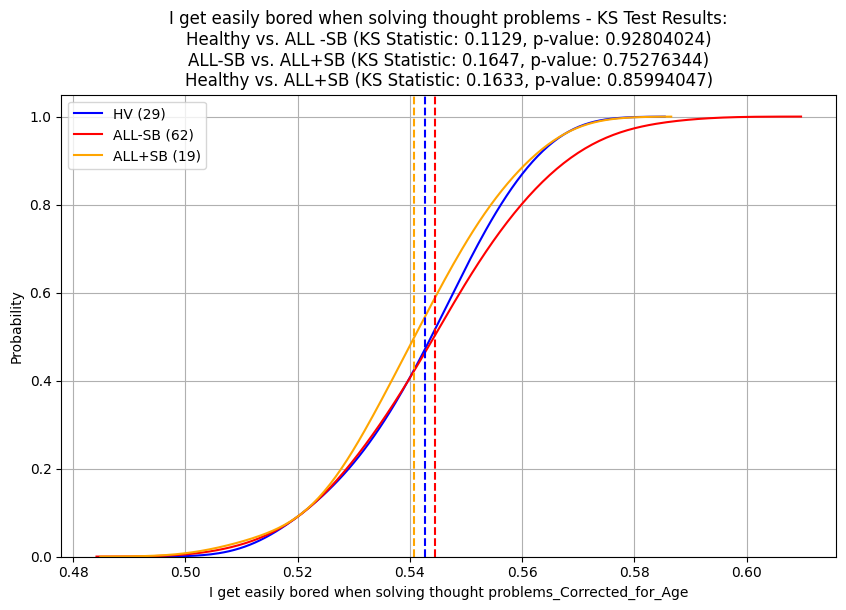

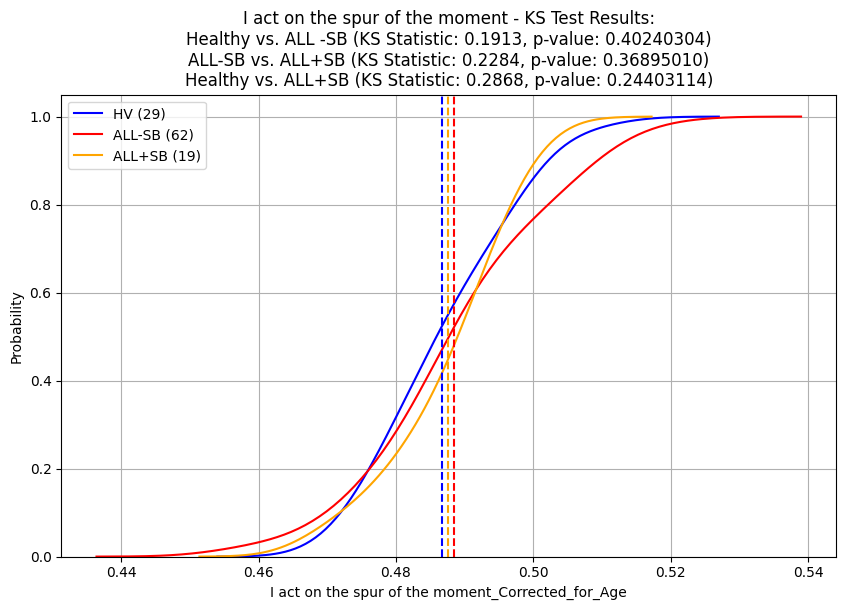

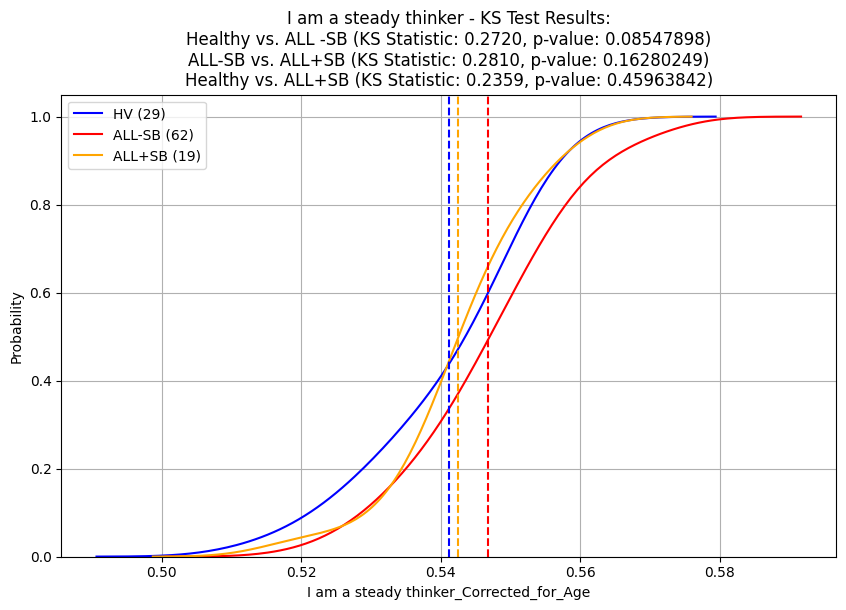

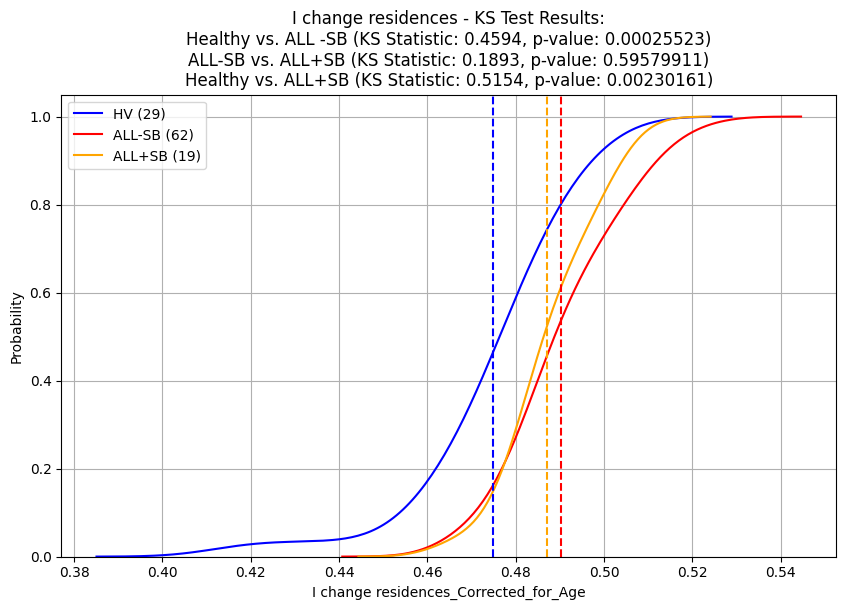

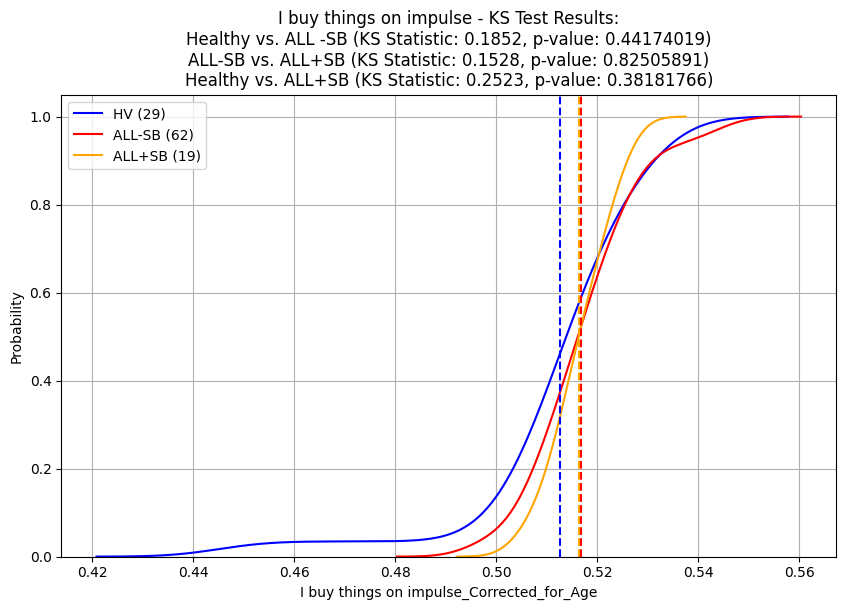

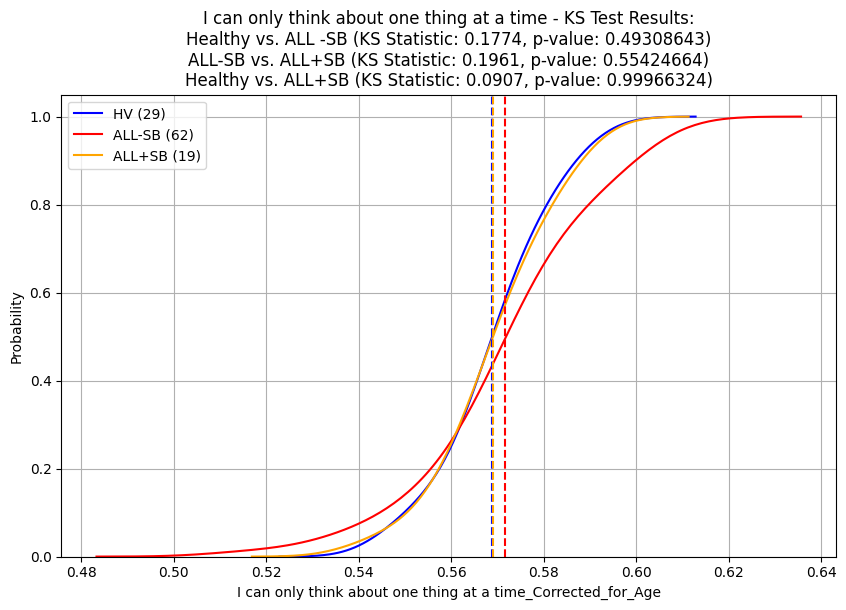

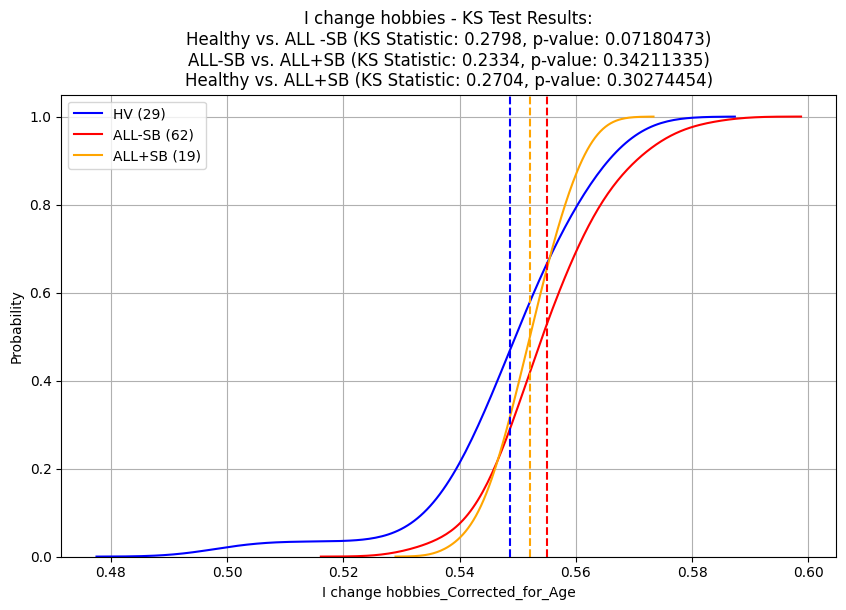

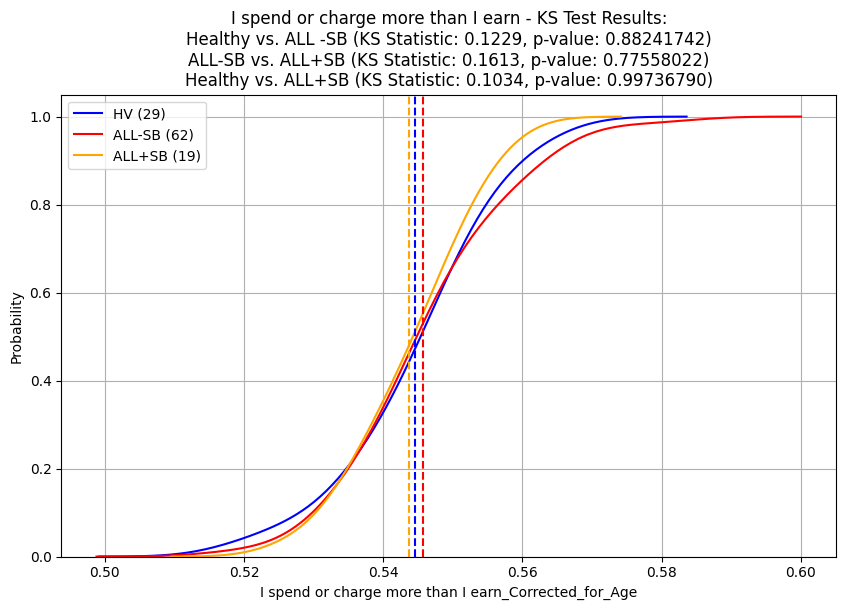

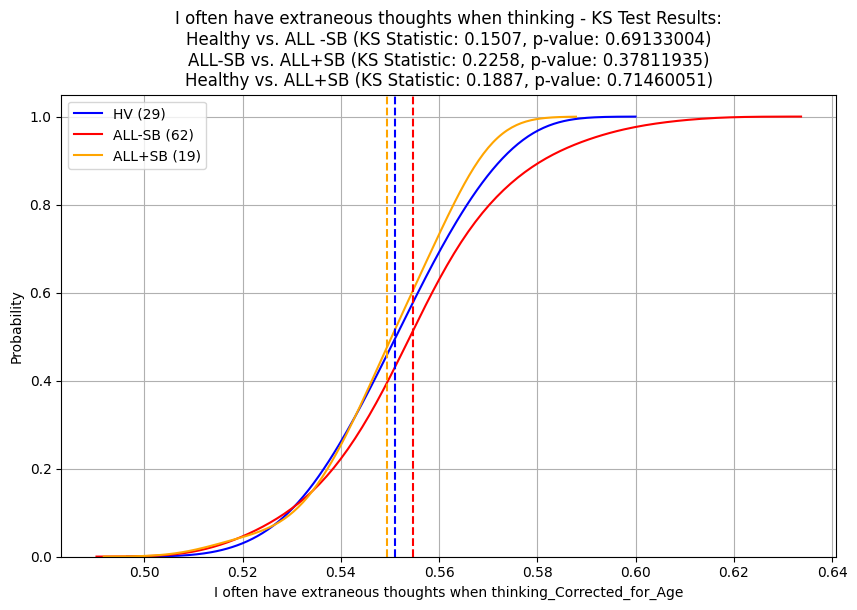

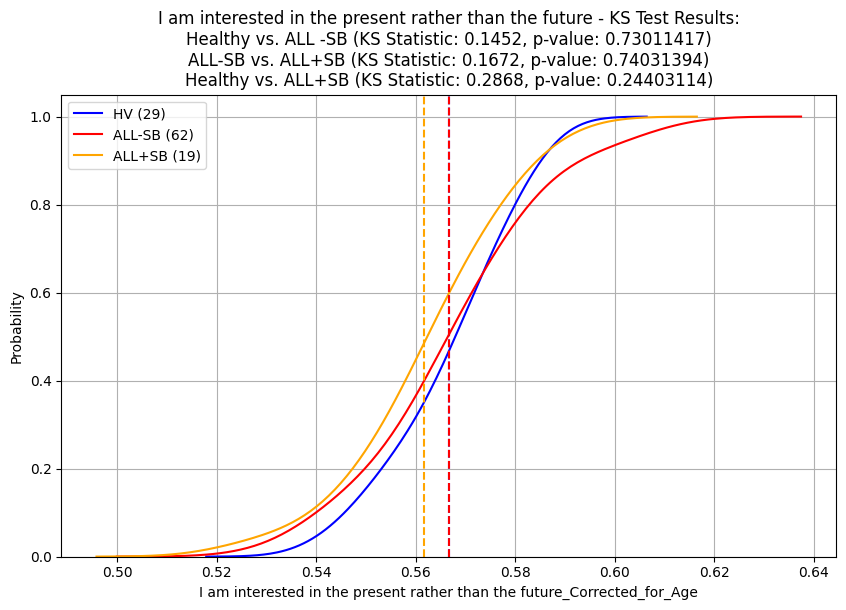

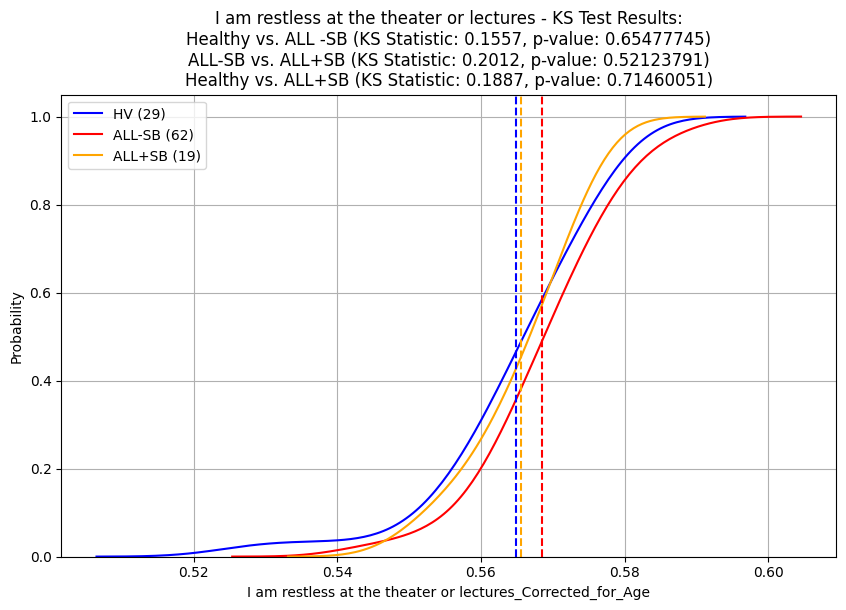

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ks_2samp
from matplotlib.backends.backend_pdf import PdfPages

# Define the columns to iterate
columns_to_iterate = healthy_df.columns[2:32]

with PdfPages('my_plots_age_corrected.pdf') as pdf:
    for col in columns_to_iterate:
        plt.figure(figsize=(10, 6))

        # Create the KDE plots for each group
        ax = sns.kdeplot(healthy_df[col], color='blue', cumulative=True, label=f'HV ({len(healthy_df)})')
        ax = sns.kdeplot(minus_sb_df[col], color='red', cumulative=True, label=f'ALL-SB ({len(minus_sb_df)})')
        ax = sns.kdeplot(plus_sb_df[col], color='orange', cumulative=True, label=f'ALL+SB ({len(plus_sb_df)})')

        # Calculate KS test statistics and p-values
        ks_statistic_hv_minus, p_value_hv_minus = ks_2samp(healthy_df[col], minus_sb_df[col])
        ks_statistic_minus_plus, p_value_minus_plus = ks_2samp(minus_sb_df[col], plus_sb_df[col])
        ks_statistic_hv_plus, p_value_hv_plus = ks_2samp(healthy_df[col], plus_sb_df[col])

        # Add vertical lines for the means
        mean_healthy = np.mean(healthy_df[col])
        mean_minus = np.mean(minus_sb_df[col])
        mean_plus = np.mean(plus_sb_df[col])

        plt.axvline(mean_healthy, color='blue', linestyle='--')
        plt.axvline(mean_minus, color='red', linestyle='--')
        plt.axvline(mean_plus, color='orange', linestyle='--')

        # Add a legend
        plt.legend()

        # Create the title with KS test results
        title = f'{col} - KS Test Results:\n'
        title += f'Healthy vs. ALL -SB (KS Statistic: {ks_statistic_hv_minus:.4f}, p-value: {p_value_hv_minus:.8f})\n'
        title += f'ALL-SB vs. ALL+SB (KS Statistic: {ks_statistic_minus_plus:.4f}, p-value: {p_value_minus_plus:.8f})\n'
        title += f'Healthy vs. ALL+SB (KS Statistic: {ks_statistic_hv_plus:.4f}, p-value: {p_value_hv_plus:.8f})'

        # Set the title and labels
        plt.title(title)
        ax.set_xlabel(col+"_Corrected_for_Age")
        ax.set_ylabel("Probability")

        plt.grid(True)
        pdf.savefig()  # saves the current figure into the pdf

    # Show or save the plots as needed
    plt.show()


In [ ]:
concatenated_df=pd.concat([healthy_df,minus_sb_df,plus_sb_df],axis=0)

In [ ]:
concatenated_df.to_csv("../data/SIB_impulsivity_scores_corrected_age.csv",index=False)